In [3]:
import numpy
from scipy import linalg
from matplotlib import pyplot
%matplotlib inline

In [4]:
def btcs(T0, nt, dt, delta, alpha, Tb):
    #delta, grid spacing in both directions
    #Tb temp at boundry
    ny, nx = T0.shape #first # of rows second # of columns
    M, N = nx - 2, ny - 2
    sigma = alpha * dt / delta**2
    A = lhs_operator(M, N, sigma)
    T = T0[1:-1, 1:-1].flatten()
    I, J = int(M / 2), int(N / 2)
    for n in range(nt):
        b = rhs_vector(T, M, N, sigma, Tb)
        T = linalg.solve(A, b)
        if T[J * M + I] >= 70.0:
            break
    print('Time step {}; Temperature at the Center {} C'.format(n, T[J * M + 1]))
    return map_1d_to_2d(T, nx, ny, Tb)

In [5]:
def map_1d_to_2d(T1, nx, ny, Tb):
    T = numpy.zeros((ny, nx))
    T[1:-1, 1:-1] = T1.reshape((ny - 2, nx - 2))
    T[:,0] = Tb
    T[0,:] = Tb
    T[:, -1] = T[:, -2]
    T[-1, :] = T[-2, :]
    return T

In [6]:
def rhs_vector(T, M, N, sigma, Tb):
    b = T / sigma
    for j in range(N):
        for i in range(M):
            I = j * M + i
            if i == 0:
                b[I] += Tb
            if j == 0:
                b[I] += Tb
    return b

In [7]:
def lhs_operator(M, N, sigma):
    A = numpy.zeros((M * N, M * N)) # (rows, columns)
    for j in range(N):
        for i in range(M):
            I  = j * M + i # global index
            IS = I - M #south point
            IW = I - 1 #west  point
            IE = I + 1 #east  point
            IN = I + M #north point
            if i == 0 and j == 0:
                A[I, I]  = 1.0 / sigma + 4.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
            elif i == 0 and j == N - 1:
                A[I, I]  = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IE] = -1.0
            elif i == M - 1 and j ==0:
                A[I, I]  = 1.0 / sigma + 3.0
                A[I, IW] = -1.0
                A[I, IN] = -1.0
            elif i == M - 1 and j == N - 1:
                A[I, I]  = 1.0 / sigma + 2.0
                A[I, IW] = -1.0
                A[I, IS] = -1.0
            elif i == 0:
                A[I, I]  = 1.0 / sigma + 4.0
                A[I, IS] = -1.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
            elif j == 0:
                A[I, I]  = 1.0 / sigma + 4.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
            elif i == M - 1:
                A[I, I]  = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IN] = -1.0
            elif j == N - 1:
                A[I, I]  = 1.0 / sigma + 3.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
            else:
                A[I, I]  = 1.0 / sigma + 4.0
                A[I, IS] = -1.0
                A[I, IW] = -1.0
                A[I, IE] = -1.0
                A[I, IN] = -1.0
    return A

In [8]:
#parameters
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

alpha = 1e-4

#discretize domain
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

#initial conditions
# T is a 2d array with (y, x)
#begin with all at 20C except the x = 0 and y = 0 is 100C
T0 = 20.0 * numpy.ones((ny, nx))
T0[0,:] = 100.0
T0[:,0] = 100.0
#print(T0)

In [9]:
sigma = 0.5
dt = sigma / (alpha * (1 / dx**2 + 1 / dy**2)) 
nt = 500

In [10]:
T = btcs(T0, nt, dt, dx, alpha, 100.0)

Time step 256; Temperature at the Center 93.1656321797884 C


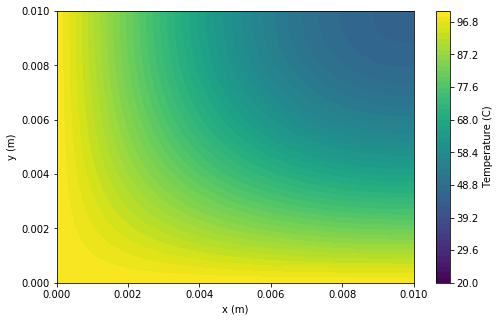

In [11]:
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x (m)')
pyplot.ylabel('y (m)')
contf = pyplot.contourf(x, y, T,
                        levels=numpy.linspace(20.0, 100.0, num = 51))
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature (C)')